In [1]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Imarticus\stat\Disasters(Richter's Predictor - Modeling Earthquake Damage)"

D:\Imarticus\stat\Disasters(Richter's Predictor - Modeling Earthquake Damage)


In [3]:
dr_tr=pd.read_csv('train_values.csv')

In [4]:
dr_tt=pd.read_csv('test_values.csv')

In [5]:
dr_labels=pd.read_csv('train_labels.csv')

In [6]:
dr_tr=dr_tr.merge(dr_labels,on='building_id')

In [7]:
# We need to remove building_id in both train and test files because it's doesn't change prediction
dr_tr=dr_tr.drop(['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id'],axis=1)
dr_tt=dr_tt.drop(['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id'],axis=1)

# converting data type from int to object in train data

In [8]:
int_columns = ['count_floors_pre_eq','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
        'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry','has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other','damage_grade']

In [9]:
dr_tr[int_columns] = dr_tr[int_columns].astype('object')

# converting data type from int to object in test data

In [10]:
int_columns_tt = ['count_floors_pre_eq','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
        'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry','has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [11]:
dr_tt[int_columns_tt] = dr_tt[int_columns_tt].astype('object')

# splitting into numcols and objcols

In [12]:
numcols=dr_tr.select_dtypes(include=np.number)
objcols=dr_tr.select_dtypes(include='object')

# Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mm=MinMaxScaler()

In [15]:
numcols_mm=mm.fit_transform(numcols)

In [16]:
numcols_mm=pd.DataFrame(numcols_mm,columns=numcols.columns)

# label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lb=LabelEncoder()

In [19]:
objcols=objcols.apply(LabelEncoder().fit_transform)

# splitting into numcols and objcols for test dataframe

In [20]:
numcols_tt=dr_tt.select_dtypes(include=np.number)
objcols_tt=dr_tt.select_dtypes(include='object')

In [21]:
numcols_tt_mm=mm.fit_transform(numcols_tt)

In [22]:
numcols_tt_mm=pd.DataFrame(numcols_tt_mm,columns=numcols.columns)

In [23]:
objcols_tt=objcols_tt.apply(LabelEncoder().fit_transform)

In [24]:
combinedf=pd.concat([numcols_mm,objcols],axis=1)

In [25]:
dr_tt=pd.concat([numcols_tt_mm,objcols_tt],axis=1)

# Splitting into Dependent(y) and Independent variables(X's)

In [26]:
X=combinedf.drop('damage_grade',axis=1)
y=combinedf.damage_grade

# TensorFlow

In [27]:
import tensorflow
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [28]:
y1 = to_categorical(y)

In [29]:
# Building the ANN
model = Sequential()
# Input layer
model.add(Dense(128, activation='relu', input_dim=X.shape[1]))
# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# Output layer
model.add(Dense(y1.shape[1], activation='softmax'))
# Compiling the ANN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4608      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 15523 (60.64 KB)
Trainable params: 15523 (

In [30]:
# Training the ANN
model.fit(X,y1,batch_size=32,epochs=30,validation_data=(X,y1))

Epoch 1/30
7330/7330 [==============================] - 10s 1ms/step - loss: 0.8247 - accuracy: 0.5745 - val_loss: 0.8017 - val_accuracy: 0.5867
Epoch 2/30
7330/7330 [==============================] - 9s 1ms/step - loss: 0.8000 - accuracy: 0.5846 - val_loss: 0.7961 - val_accuracy: 0.5902
Epoch 3/30
7330/7330 [==============================] - 9s 1ms/step - loss: 0.7945 - accuracy: 0.5883 - val_loss: 0.7895 - val_accuracy: 0.5953
Epoch 4/30
7330/7330 [==============================] - 9s 1ms/step - loss: 0.7913 - accuracy: 0.5909 - val_loss: 0.7919 - val_accuracy: 0.5900
Epoch 5/30
7330/7330 [==============================] - 9s 1ms/step - loss: 0.7886 - accuracy: 0.5915 - val_loss: 0.7867 - val_accuracy: 0.5963
Epoch 6/30
7330/7330 [==============================] - 9s 1ms/step - loss: 0.7870 - accuracy: 0.5939 - val_loss: 0.7851 - val_accuracy: 0.5936
Epoch 7/30
7330/7330 [==============================] - 9s 1ms/step - loss: 0.7854 - accuracy: 0.5945 - val_loss: 0.7835 - val_accuracy

In [31]:
# Evaluating the model
y_pred = model.predict(X)

8144/8144 [==============================] - 6s 741us/step


In [89]:
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

[1 1 1 ... 1 1 2]


In [90]:
y_pred1=pd.DataFrame(y_pred_classes).reset_index()

In [91]:
y_pred1.head()

,index,0
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
260596,260596,1
260597,260597,1
260598,260598,1
260599,260599,1


In [92]:
y_pred1=y_pred1.drop('index',axis=1)

In [93]:
y_pred1 = y_pred1.rename(columns={0: 'Damage_grade'})

In [94]:
y_pred1.value_counts()

Damage_grade
1               226671
2                23643
0                10287
Name: count, dtype: int64

<Axes: ylabel='count'>

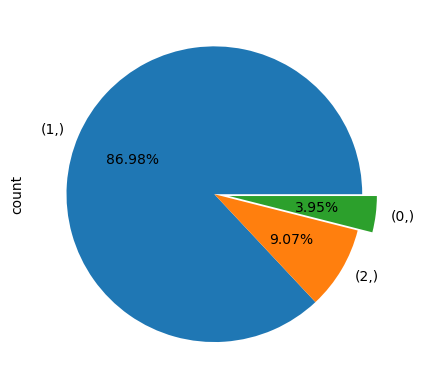

In [52]:
y_pred1.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [97]:
conf_matrix = confusion_matrix(y, y_pred1)
print(conf_matrix)

[[  6791  18028    305]
 [  3194 136135   8930]
 [   302  72508  14408]]


In [98]:
conf_matrix_df = pd.DataFrame(conf_matrix)
print(conf_matrix_df)

      0       1      2
0  6791   18028    305
1  3194  136135   8930
2   302   72508  14408


In [99]:
print(classification_report(y, y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.27      0.38     25124
           1       0.60      0.92      0.73    148259
           2       0.61      0.17      0.26     87218

    accuracy                           0.60    260601
   macro avg       0.62      0.45      0.46    260601
weighted avg       0.61      0.60      0.54    260601



In [ ]:
print(model.history.history.keys())

In [ ]:
epochs = list(range(1, 31))
train_accuracy = model.history.history['accuracy'][:30]   # Truncate to match val_accuracy length
val_accuracy = model.history.history['val_accuracy'][:30]
# Plotting
plt.figure(figsize=(15,6))
plt.plot(epochs,train_accuracy, marker='o',linestyle='-',label="Train Accuracy")
plt.plot(epochs,val_accuracy, marker='o',linestyle='-',label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
# Annotate each point with its score and symbol
for epoch, train_score, val_score in zip(epochs, train_accuracy, val_accuracy):
    plt.text(epoch, train_score, f'Tr: {train_score:.2f}', ha='right', va='bottom', fontsize=8)
    plt.text(epoch, val_score, f'Va: {val_score:.2f}', ha='right', va='top', fontsize=8)
plt.show()

In [ ]:
epochs = list(range(1, 31))
train_loss = model.history.history['loss'][:31]  # Truncate to match val_loss length
val_loss = model.history.history['val_loss'][:31]
# Plotting
plt.figure(figsize=(15,6))
plt.plot(epochs, train_loss, marker='o', linestyle='-', label="Train Loss")
plt.plot(epochs, val_loss, marker='o', linestyle='-', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
# Annotate each point with its score and symbol
for epoch, train_loss_score, val_loss_score in zip(epochs, train_loss, val_loss):
    plt.text(epoch, train_loss_score, f'Tr:{train_loss_score:.2f}',ha='right',va='bottom',fontsize=8)
    plt.text(epoch, val_loss_score, f'Va: {val_loss_score:.2f}', ha='right',va='top',fontsize=8)
plt.show()

In [101]:
tt=model.predict(dr_tt)
test1 = np.argmax(tt, axis=1)

2715/2715 [==============================] - 2s 713us/step
[1 1 1 ... 1 1 1]


In [102]:
print(test1)

[1 1 1 ... 1 1 1]


In [103]:
test1=pd.DataFrame(test1)

In [104]:
test1.value_counts()

1    75774
2     7734
0     3360
Name: count, dtype: int64

<Axes: ylabel='count'>

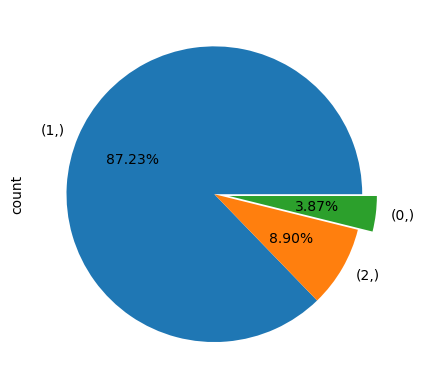

In [105]:
test1.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1])

# Converting Imbalance data to Balance Data

In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
sm=SMOTE(random_state=42)

In [108]:
X_smote,y_smote=sm.fit_resample(X,y)

# Model

In [109]:
y_sm = to_categorical(y_smote)

In [110]:
# Building the ANN
model_sm = Sequential()
# Input layer
model_sm.add(Dense(128, activation='relu', input_dim=X_smote.shape[1]))
# Hidden layers
model_sm.add(Dense(64, activation='relu'))
model_sm.add(Dropout(0.3))  # Adding dropout for regularization
model_sm.add(Dense(32, activation='relu'))
model_sm.add(Dense(16, activation='relu'))
# Output layer
model_sm.add(Dense(y_sm.shape[1], activation='softmax'))
# Compiling the ANN
model_sm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_sm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               4608      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 3)                 51        
                                                                 
Total params: 15523 (60.64 KB)
Trainable params: 15523

In [161]:
# Training the ANN
model_sm.fit(X_smote,y_sm,batch_size=64,epochs=30,validation_data=(X_smote,y_sm))

Epoch 1/30
6950/6950 [==============================] - 14s 2ms/step - loss: 0.7648 - accuracy: 0.6193 - val_loss: 0.7555 - val_accuracy: 0.6252
Epoch 2/30
6950/6950 [==============================] - 15s 2ms/step - loss: 0.7649 - accuracy: 0.6187 - val_loss: 0.7575 - val_accuracy: 0.6246
Epoch 3/30
6950/6950 [==============================] - 16s 2ms/step - loss: 0.7647 - accuracy: 0.6185 - val_loss: 0.7566 - val_accuracy: 0.6251
Epoch 4/30
6950/6950 [==============================] - 16s 2ms/step - loss: 0.7643 - accuracy: 0.6191 - val_loss: 0.7628 - val_accuracy: 0.6256
Epoch 5/30
6950/6950 [==============================] - 16s 2ms/step - loss: 0.7640 - accuracy: 0.6195 - val_loss: 0.7571 - val_accuracy: 0.6255
Epoch 6/30
6950/6950 [==============================] - 15s 2ms/step - loss: 0.7640 - accuracy: 0.6189 - val_loss: 0.7571 - val_accuracy: 0.6264
Epoch 7/30
6950/6950 [==============================] - 16s 2ms/step - loss: 0.7646 - accuracy: 0.6191 - val_loss: 0.7564 - val_ac

In [112]:
# Evaluating the model
y_pred_sm = model_sm.predict(X_smote)

13900/13900 [==============================] - 10s 741us/step


In [113]:
y_pred_sm = np.argmax(y_pred_sm, axis=1)
print(y_pred_sm)

[1 1 2 ... 2 1 1]


In [114]:
y_sm1=pd.DataFrame(y_pred_sm).reset_index()

In [115]:
y_sm1.head()

,index,0
0,0,1
1,1,1
2,2,2
3,3,0
4,4,2


In [120]:
y_sm1=y_sm1.drop('index',axis=1)

In [121]:
y_sm1 = y_sm1.rename(columns={0: 'Damage_grade'})

In [122]:
y_sm1.value_counts()

Damage_grade
1               199779
0               157596
2                87402
Name: count, dtype: int64

<Axes: ylabel='count'>

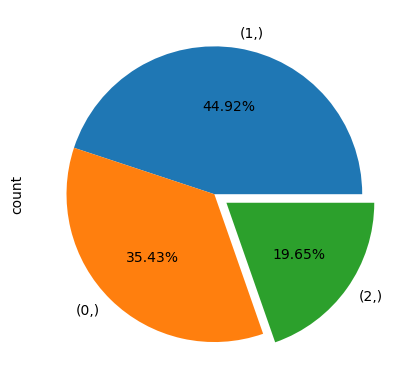

In [123]:
y_sm1.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1])

In [126]:
conf_matrix_sm = confusion_matrix(y_smote, y_sm1)
print(conf_matrix_sm)

[[115582  27841   4836]
 [ 25584  94942  27733]
 [ 16430  76996  54833]]


In [127]:
conf_matrix_sm = pd.DataFrame(conf_matrix_sm)
print(conf_matrix_df)

      0       1      2
0  6791   18028    305
1  3194  136135   8930
2   302   72508  14408


In [129]:
print(classification_report(y_smote, y_sm1))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76    148259
           1       0.48      0.64      0.55    148259
           2       0.63      0.37      0.47    148259

    accuracy                           0.60    444777
   macro avg       0.61      0.60      0.59    444777
weighted avg       0.61      0.60      0.59    444777



In [148]:
print(model_sm.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


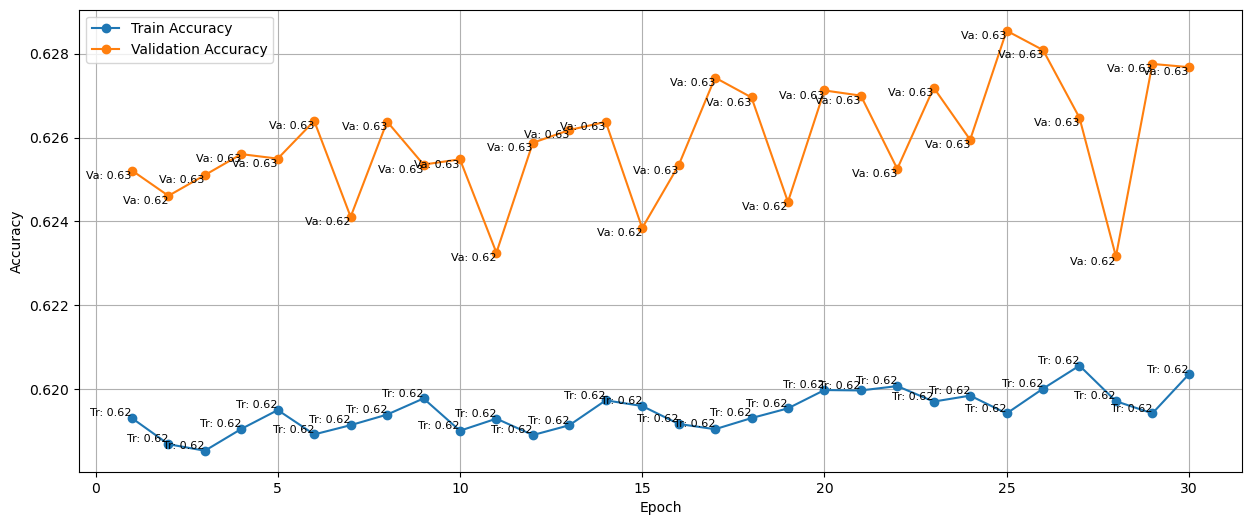

In [162]:
epochs = list(range(1, 31))
train_accuracy = model_sm.history.history['accuracy'][:30]   # Truncate to match val_accuracy length
val_accuracy = model_sm.history.history['val_accuracy'][:30]
# Plotting
plt.figure(figsize=(15,6))
plt.plot(epochs,train_accuracy, marker='o',linestyle='-',label="Train Accuracy")
plt.plot(epochs,val_accuracy, marker='o',linestyle='-',label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
# Annotate each point with its score and symbol
for epoch, train_score, val_score in zip(epochs, train_accuracy, val_accuracy):
    plt.text(epoch, train_score, f'Tr: {train_score:.2f}', ha='right', va='bottom', fontsize=8)
    plt.text(epoch, val_score, f'Va: {val_score:.2f}', ha='right', va='top', fontsize=8)
plt.show()

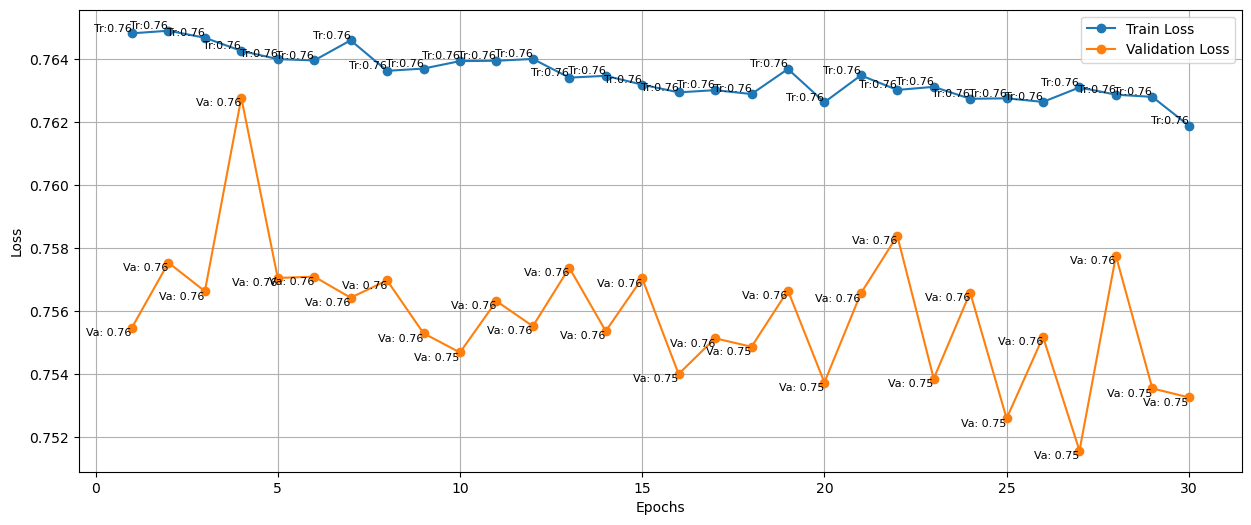

In [163]:
epochs = list(range(1, 31))
train_loss = model_sm.history.history['loss'][:31]  # Truncate to match val_loss length
val_loss = model_sm.history.history['val_loss'][:31]
# Plotting
plt.figure(figsize=(15,6))
plt.plot(epochs, train_loss, marker='o', linestyle='-', label="Train Loss")
plt.plot(epochs, val_loss, marker='o', linestyle='-', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
# Annotate each point with its score and symbol
for epoch, train_loss_score, val_loss_score in zip(epochs, train_loss, val_loss):
    plt.text(epoch, train_loss_score, f'Tr:{train_loss_score:.2f}',ha='right',va='bottom',fontsize=8)
    plt.text(epoch, val_loss_score, f'Va: {val_loss_score:.2f}', ha='right',va='top',fontsize=8)
plt.show()

In [132]:
tt_sm=model_sm.predict(dr_tt)
test_sm = np.argmax(tt_sm, axis=1)

2715/2715 [==============================] - 2s 746us/step


In [133]:
print(test_sm)

[2 1 1 ... 1 1 0]


In [134]:
test_sm=pd.DataFrame(test_sm)

In [135]:
test_sm.value_counts()

1    49888
2    20383
0    16597
Name: count, dtype: int64

<Axes: ylabel='count'>

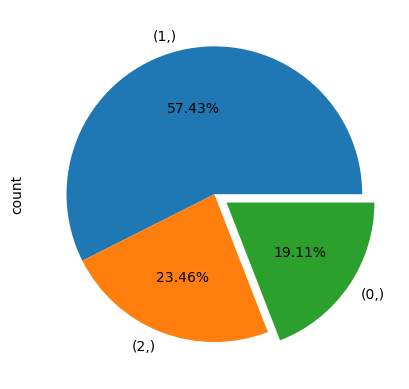

In [136]:
test_sm.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1])